In [0]:
#참고: https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [0]:
sentences = [
        "Nature is beautiful","I like green apples",
        "We should protect the trees","Fruit trees provide fruits",
        "Green apples are tasty", "This is the test",
        "Plastic cup", "Plastic plate",
        "bredding horse", "racing horse"
        ]

In [39]:
tfidf = TfidfVectorizer(
    min_df = 2,
    max_df = 50,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(sentences)
tfidf_matrix = tfidf.transform(sentences)

print('tfidf_matrix:', tfidf_matrix.shape)

tfidf_matrix: (10, 5)


In [40]:
#10, 50, 100, 200, 300, ...arr값으로 테스트해보기...
#def find_optimal_clusters(data, max_k):
sse = []
iters = range(1, 10, 1)
#k_arr = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000]    
def find_optimal_clusters(data):
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
find_optimal_clusters(tfidf_matrix)

Fit 1 clusters
Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters


Text(0.5, 1.0, 'SSE by Cluster Center Plot')

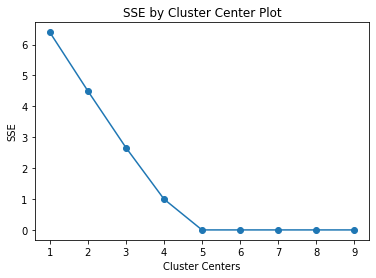

In [41]:
f, ax = plt.subplots(1, 1)
ax.plot(iters, sse, marker='o')
ax.set_xlabel('Cluster Centers')
ax.set_xticks(iters)
ax.set_xticklabels(iters)
ax.set_ylabel('SSE')
ax.set_title('SSE by Cluster Center Plot')

In [0]:
clusters = MiniBatchKMeans(n_clusters=5, init_size=1024, batch_size=2048, random_state=20).fit_predict(tfidf_matrix)

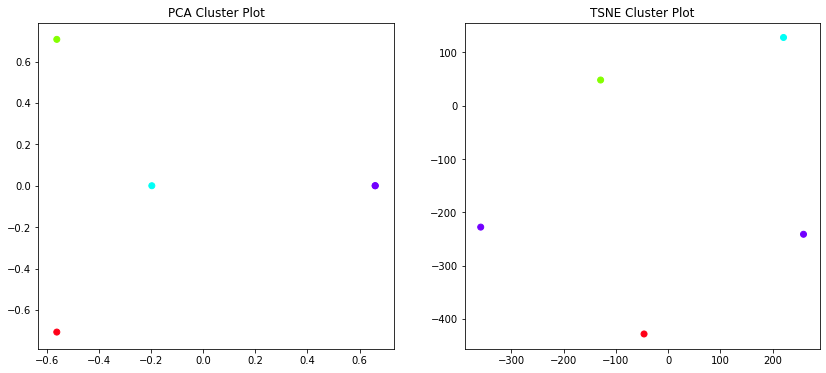

In [42]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=5, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=3).fit_transform(data[max_items,:].todense()))    
    
    idx = np.random.choice(range(pca.shape[0]), size=5, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(tfidf_matrix, clusters)

In [43]:
def get_top_keywords(data, clusters, labels, n_terms):
    print('clusters:', clusters)
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    print('df:', df)

    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(tfidf_matrix, clusters, tfidf.get_feature_names(), 3)

clusters: [2 1 0 0 1 2 3 3 4 4]
df:           0         1    2    3    4
0  0.000000  0.000000  0.0  0.0  1.0
1  0.707107  0.707107  0.0  0.0  0.0
2  0.000000  0.000000  0.0  0.0  0.0
3  0.000000  0.000000  0.0  1.0  0.0
4  0.000000  0.000000  1.0  0.0  0.0

Cluster 0
horse,plastic,trees

Cluster 1
trees,apples,green

Cluster 2
horse,plastic,trees

Cluster 3
horse,trees,plastic

Cluster 4
plastic,trees,horse
